In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Load dataset, specifying the encoding
df = pd.read_csv('sage_tae_2019_df.csv', encoding='utf-16') # Changed to 'utf-16'

# Drop irrelevant column
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
# Separate numerical and categorical features
numerical_features = df.select_dtypes(include=['number']).columns
categorical_features = df.select_dtypes(exclude=['number']).columns

# Create imputers for numerical and categorical features
numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation to respective features
df[numerical_features] = numerical_imputer.fit_transform(df[numerical_features])
df[categorical_features] = categorical_imputer.fit_transform(df[categorical_features])

In [ ]:
encoder = LabelEncoder()
df['SEX'] = encoder.fit_transform(df['SEX'])


In [ ]:
scaler = MinMaxScaler()
# Select only numerical features for scaling
df[numerical_features] = scaler.fit_transform(df[numerical_features])

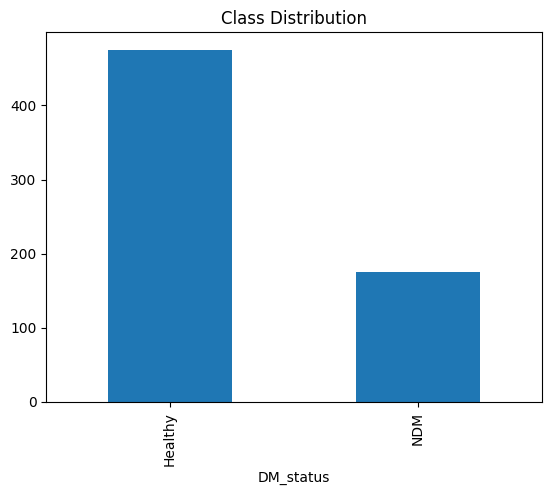

In [ ]:
import matplotlib.pyplot as plt

# Class distribution
df['DM_status'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.show()


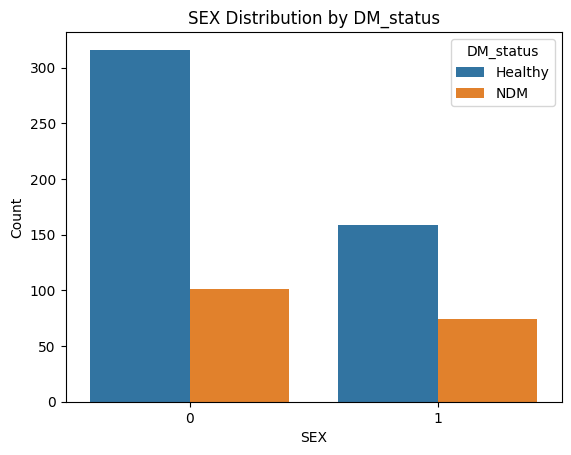

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'DM_status' is your target variable
sns.countplot(x='SEX', hue='DM_status', data=df)
plt.title('SEX Distribution by DM_status')
plt.xlabel('SEX')
plt.ylabel('Count')
plt.show()

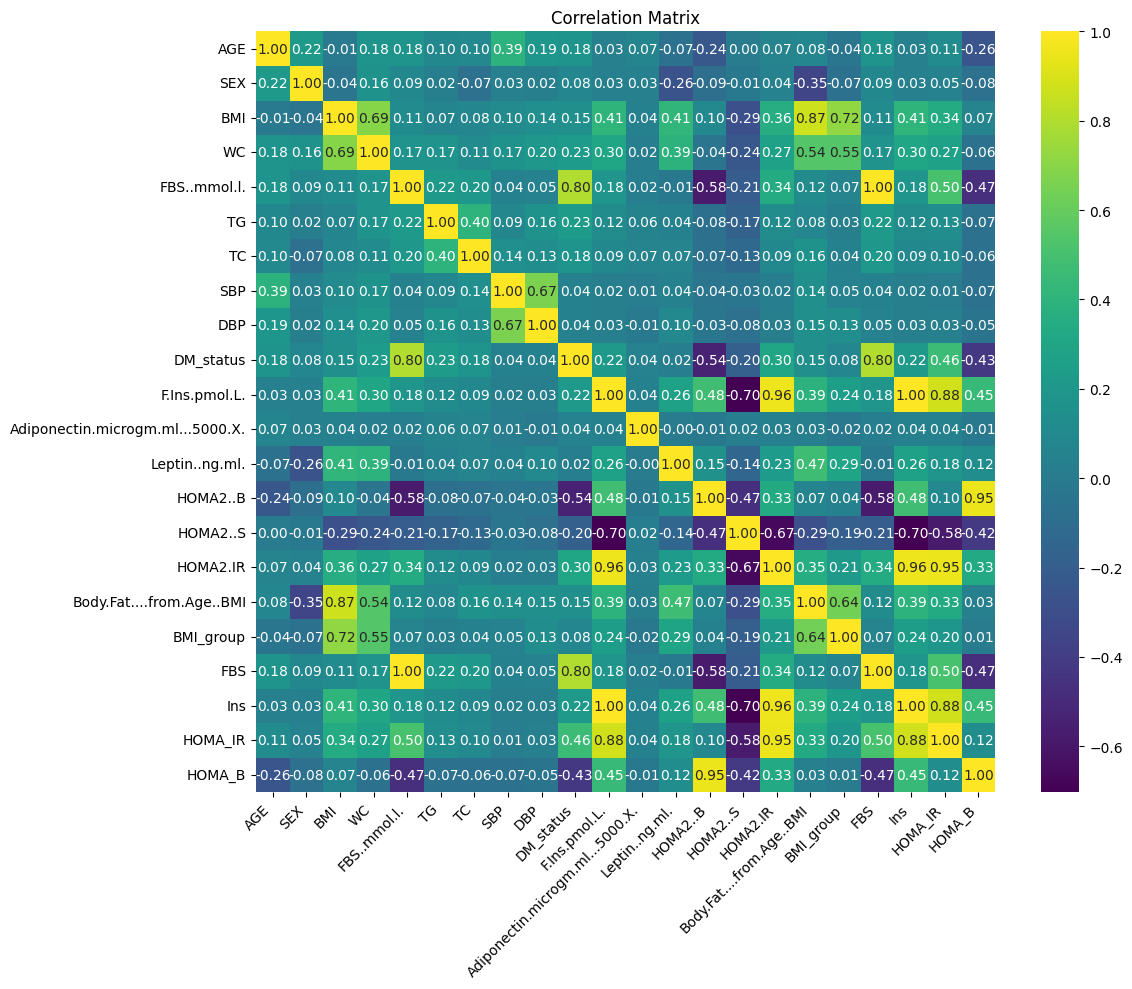

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Identify columns with 'object' dtype (likely categorical)
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply Label Encoding to all identified categorical columns
for col in categorical_cols:
    encoder = LabelEncoder()  # Create a new encoder for each column
    df[col] = encoder.fit_transform(df[col])

# Now calculate the correlation matrix
correlation_matrix = df.corr()


# Increase figure size and rotate x-axis labels
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")  # Format annotations to 2 decimal places
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
X = df.drop('DM_status', axis=1)  # Assuming 'DM_status' is your target variable
y = df['DM_status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initializing of classifiers
svc_classifier = SVC()
rf_classifier = RandomForestClassifier()
xgb_classifier = XGBClassifier()

# Train of classifiers
svc_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)
xgb_classifier.fit(X_train, y_train)

# predictions on the test set
svc_predictions = svc_classifier.predict(X_test)
rf_predictions = rf_classifier.predict(X_test)
xgb_predictions = xgb_classifier.predict(X_test)



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Function to calculate and print metrics
def evaluate_classifier(y_true, y_pred, classifier_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)

    print(f"Metrics for {classifier_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"ROC AUC: {roc_auc:.4f}\n")

# Evaluate each classifier
evaluate_classifier(y_test, svc_predictions, "SVC")
evaluate_classifier(y_test, rf_predictions, "Random Forest")
evaluate_classifier(y_test, xgb_predictions, "XGBoost")

Metrics for SVC:
Accuracy: 0.9846
Precision: 1.0000
Recall: 0.9487
F1-score: 0.9737
Confusion Matrix:
[[91  0]
 [ 2 37]]
ROC AUC: 0.9744

Metrics for Random Forest:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
Confusion Matrix:
[[91  0]
 [ 0 39]]
ROC AUC: 1.0000

Metrics for XGBoost:
Accuracy: 0.9923
Precision: 1.0000
Recall: 0.9744
F1-score: 0.9870
Confusion Matrix:
[[91  0]
 [ 1 38]]
ROC AUC: 0.9872



In [ ]:
!pip install xgboost==1.7.5 scikit-learn==1.2.2

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
# Initialize and train Logistic Regression model
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)

# Make predictions
lr_predictions = lr_classifier.predict(X_test)

# Evaluate the classifier
evaluate_classifier(y_test, lr_predictions, "Logistic Regression")

Metrics for Logistic Regression:
Accuracy: 0.9538
Precision: 1.0000
Recall: 0.8462
F1-score: 0.9167
Confusion Matrix:
[[91  0]
 [ 6 33]]
ROC AUC: 0.9231



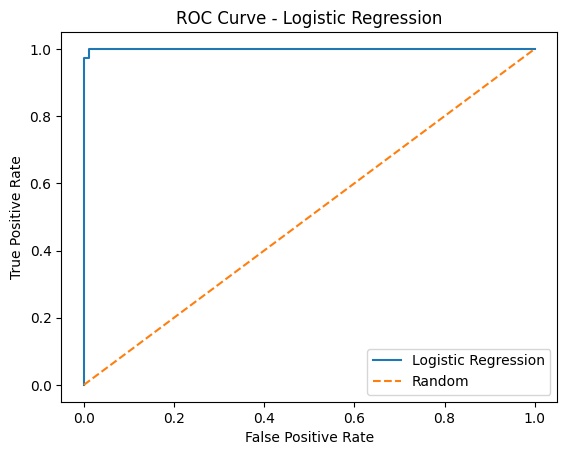

In [ ]:
# Plot ROC curve for Logistic Regression
lr_probs = lr_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, lr_probs)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

XGBoost using Hyperparameter Tuning

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

In [ ]:
# 1. Define Hyperparameter Grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    # Add other hyperparameters as needed
}

In [ ]:
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)  # Adjust objective if needed

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Accuracy: 0.9923
Precision: 1.0000
Recall: 0.9744
F1-score: 0.9870
ROC AUC: 0.9872


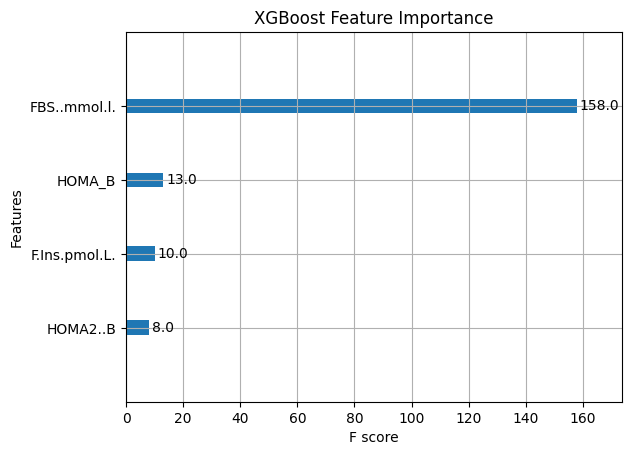

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# 1. Define Hyperparameter Grid (Assuming this is already in your code)
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    # Add other hyperparameters as needed
}

# 2. Initialize XGBoost classifier (Assuming this is already in your code)
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# 3. Create StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4. Perform Grid Search and store the best model back into xgb_classifier
xgb_classifier = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid,
    scoring='accuracy',
    cv=skf,
    n_jobs=-1,
    verbose=2
).fit(X_train, y_train)

# 5. Make predictions using the best model
y_pred = xgb_classifier.predict(X_test)

# 6. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Best Hyperparameters: {xgb_classifier.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# 7. Feature Importance Plot
xgb.plot_importance(xgb_classifier.best_estimator_)  # Access the best estimator
plt.title("XGBoost Feature Importance")
plt.show()

Model Comparison

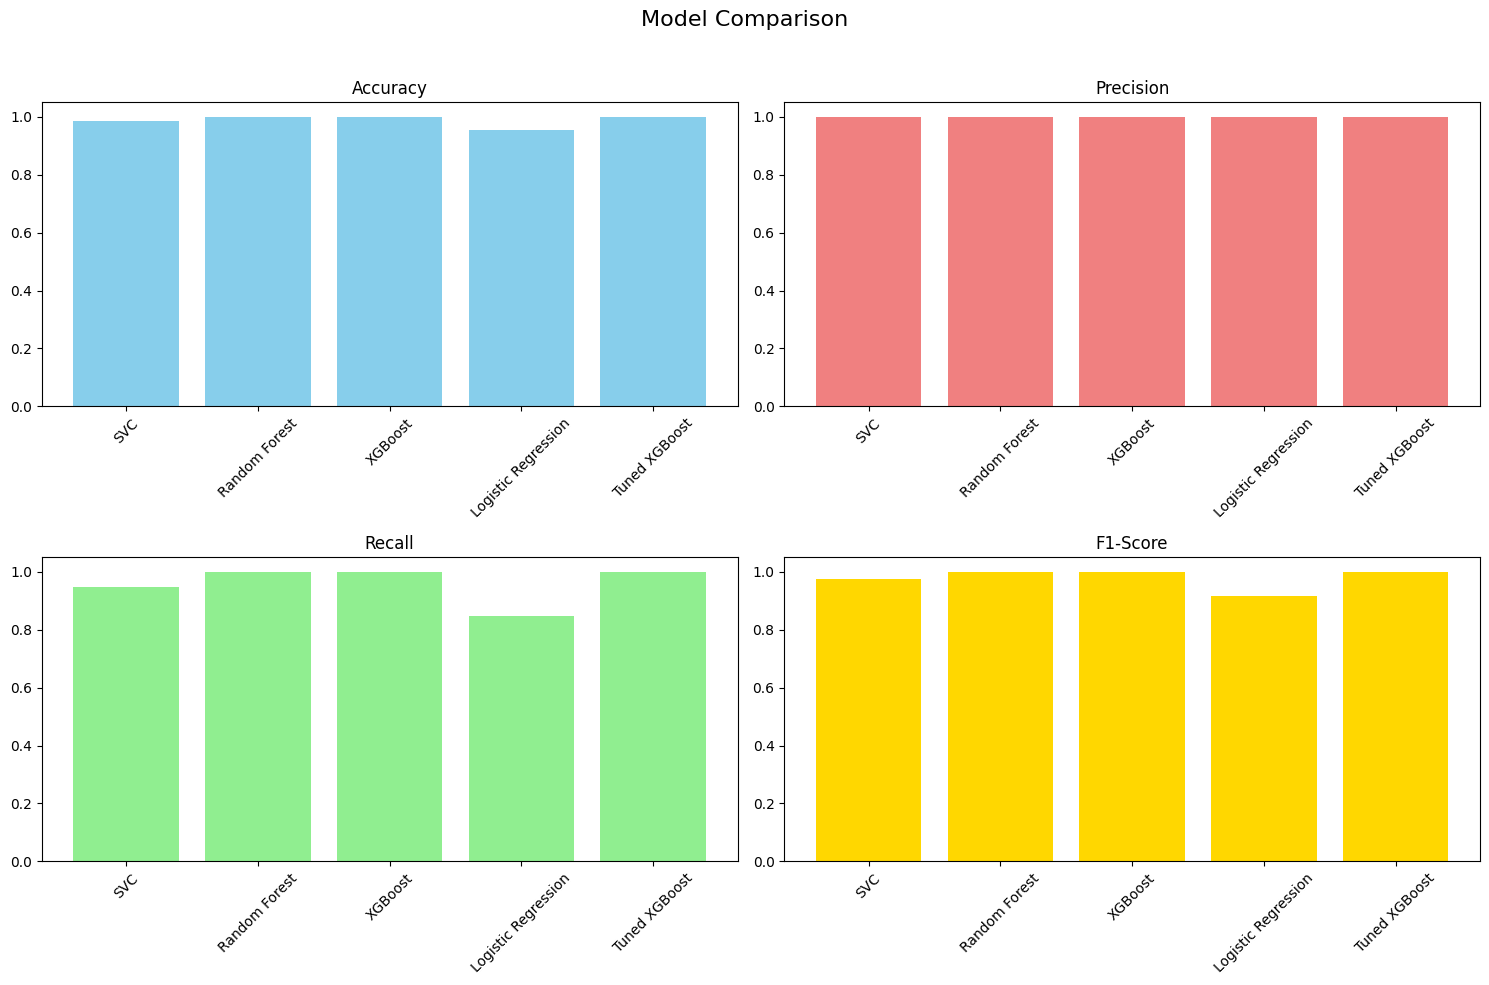

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have already trained your models and made predictions
# The models are: svc_classifier, rf_classifier, xgb_classifier, lr_classifier
# and xgb_classifier which is the result of hyperparameter tuning.
# The predictions are: svc_predictions, rf_predictions, xgb_predictions, lr_predictions
# and y_pred (the predictions from the tuned xgb model)
# and the true labels are y_test


# Create a dictionary to store the metrics
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}


def calculate_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1-Score'].append(f1)

# Calculate metrics for each model
calculate_metrics(y_test, svc_predictions, 'SVC')
calculate_metrics(y_test, rf_predictions, 'Random Forest')
calculate_metrics(y_test, xgb_predictions, 'XGBoost')
calculate_metrics(y_test, lr_predictions, 'Logistic Regression')
calculate_metrics(y_test, y_pred, 'Tuned XGBoost')


# Convert the metrics dictionary to a Pandas DataFrame
metrics_df = pd.DataFrame(metrics)

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Model Comparison', fontsize=16)

# Accuracy Plot
axes[0, 0].bar(metrics_df['Model'], metrics_df['Accuracy'], color='skyblue')
axes[0, 0].set_title('Accuracy')
axes[0, 0].tick_params(axis='x', rotation=45)

# Precision Plot
axes[0, 1].bar(metrics_df['Model'], metrics_df['Precision'], color='lightcoral')
axes[0, 1].set_title('Precision')
axes[0, 1].tick_params(axis='x', rotation=45)

# Recall Plot
axes[1, 0].bar(metrics_df['Model'], metrics_df['Recall'], color='lightgreen')
axes[1, 0].set_title('Recall')
axes[1, 0].tick_params(axis='x', rotation=45)


# F1-Score Plot
axes[1, 1].bar(metrics_df['Model'], metrics_df['F1-Score'], color='gold')
axes[1, 1].set_title('F1-Score')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

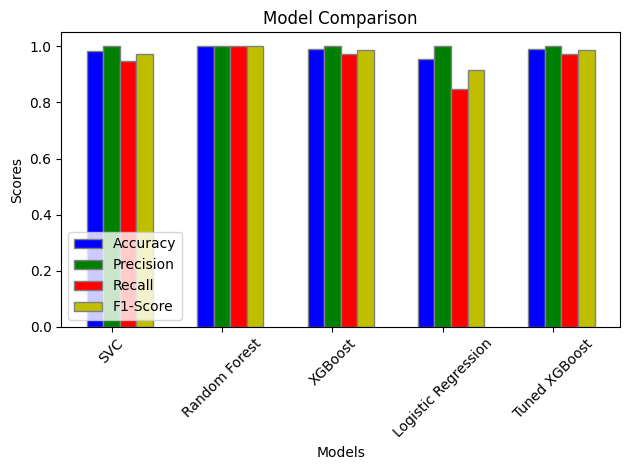

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Make sure to import f1_score


# Assuming you have already calculated these metrics for each model (from your notebook)
models = ['SVC', 'Random Forest', 'XGBoost', 'Logistic Regression', 'Tuned XGBoost']
accuracy = [accuracy_score(y_test, svc_predictions),
            accuracy_score(y_test, rf_predictions),
            accuracy_score(y_test, xgb_predictions),
            accuracy_score(y_test, lr_predictions),
            accuracy_score(y_test, y_pred)]
precision = [precision_score(y_test, svc_predictions),
             precision_score(y_test, rf_predictions),
             precision_score(y_test, xgb_predictions),
             precision_score(y_test, lr_predictions),
             precision_score(y_test, y_pred)]
recall = [recall_score(y_test, svc_predictions),
          recall_score(y_test, rf_predictions),
          recall_score(y_test, xgb_predictions),
          recall_score(y_test, lr_predictions),
          recall_score(y_test, y_pred)]

# Calculate F1-scores using the imported f1_score function
f1_scores = [f1_score(y_test, svc_predictions), # Changed variable name to f1_scores
           f1_score(y_test, rf_predictions),
           f1_score(y_test, xgb_predictions),
           f1_score(y_test, lr_predictions),
           f1_score(y_test, y_pred)]


# Set the width of the bars
bar_width = 0.15

# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create the bar plot
colors = ['#64b5f6', '#ffa726', '#81c784', '#ef5350', '#ba68c8']
plt.bar(r1, accuracy, color='b', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, precision, color='g', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, recall, color='r', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r4, f1_scores, color='y', width=bar_width, edgecolor='grey', label='F1-Score') # Use f1_scores here

# Add labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison')
plt.xticks([r + bar_width for r in range(len(models))], models, rotation=45)  # Center the x-axis labels
plt.legend(loc='lower left')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()